# Emission Impact Analysis (Case: 5bus_nrel)

In this analysis, we want to study the emissions Impact of virtual bids/offers in a grid

## Dependencies and Data Preparation

#### Packages and Diretory

In [1]:
#make sure it is in "GridAnalysis.jl" cd("C:/Users/Daniele/Desktop/Projeto/GridAnalysis.jl")

In [2]:
pwd()

"C:\\Users\\Daniele\\Desktop\\Projeto\\GridAnalysis.jl"

In [3]:
using Pkg
Pkg.activate("./examples/5bus_nrel/emission_impact_analysis_5bus_nrel")

In [4]:
Pkg.instantiate()

In [5]:
using Logging 
Logging.disable_logging(Logging.Info) #script to disable info messages 
Logging.disable_logging(Logging.Warn) #script to disable warning messages

LogLevel(1001)

In [6]:
using Dates
using DataFrames
using GridAnalysis
using Gurobi
using PowerSystems
using PowerSimulations
using Test
using Measures
using Plots

#### Uploading Utils

In [7]:
example_dir = "./examples/5bus_nrel/"
data_dir = joinpath(example_dir, "data")
include(joinpath(example_dir, "utils.jl"))

load_plot_set_of_simulations_mix

#### Data Prep and Build Market Simulator
define solvers for Unit Commitment (UC), Real Time (RT) and Economic Dispatch (ED)

In [8]:
solver_uc = optimizer_with_attributes(Gurobi.Optimizer)
solver_rt = optimizer_with_attributes(Gurobi.Optimizer)
solver_ed = optimizer_with_attributes(Gurobi.Optimizer)

MathOptInterface.OptimizerWithAttributes(Gurobi.Optimizer, Pair{MathOptInterface.AbstractOptimizerAttribute, Any}[])

## Define analysis to be done

In [9]:
Network = [DCPPowerModel]
Ramp = [true]
Minimal_generation = [true]
Reserve = [true]
Offer_Bus = ["bus1", "bus2", "bus3", "bus4", "bus5"]
bidding_period = [collect(1:24)]
Offer_Bus_mix = ["bus5"]
Load_Bus_mix = ["bus3"]
directory_name=["Net_DCPP_Load_bus3_Offer_bus5_period_1-24"]

1-element Vector{String}:
 "Net_DCPP_Load_bus3_Offer_bus5_period_1-24"

#### Create a DataFrame where each line represents one analysis 

In [10]:
df = DataFrame(Network = [], 
               Ramp = [],
               Minimal_generation = [],
               Reserve = [],
               Offer_Bus = [],
               bidding_period = []) 

for a in Network 
    for b in Ramp 
        for c in Minimal_generation 
            for d in Reserve
                for e in Offer_Bus
                    for f in bidding_period
                        new_data = DataFrame(Network = [Dict("DA"=>a, "RT"=>a)], 
                        Ramp = [Dict("DA"=>b, "RT"=>b)],
                        Minimal_generation = [Dict("DA"=>c, "RT"=>c)],
                        Reserve = [d],
                        Offer_Bus = [e],
                        bidding_period = [f])
                        append!(df, new_data)
                    end
                end
            end
        end
    end
end
df[!,5]

5-element Vector{Any}:
 "bus1"
 "bus2"
 "bus3"
 "bus4"
 "bus5"

In [11]:
df_mix = DataFrame(Network = [], 
               Ramp = [],
               Minimal_generation = [],
               Reserve = [],
               Offer_Bus = [],
               Load_Bus = [],
               bidding_period = [],
               directory_name=[]) 

for a in Network 
    for b in Ramp 
        for c in Minimal_generation 
            for d in Reserve
                for e in Offer_Bus_mix
                    for f in Load_Bus_mix
                        for g in bidding_period
                            for h in directory_name                        
                                new_data = DataFrame(Network = [Dict("DA"=>a, "RT"=>a)], 
                                Ramp = [Dict("DA"=>b, "RT"=>b)],
                                Minimal_generation = [Dict("DA"=>c, "RT"=>c)],
                                Reserve = [d],
                                Offer_Bus = [e],
                                Load_Bus = [f],
                                bidding_period = [g],
                                directory_name = [h],)
                                append!(df_mix, new_data)
                            end
                        end
                    end
                end
            end
        end
    end
end
df_mix[!, 5:8]

,Offer_Bus,Load_Bus,bidding_period
,Any,Any,Any
1,bus5,bus3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]"


#### Define range quota and period to be analysed

In [12]:
range_quota = Float64.(collect(0:0.1:4))
range_quota_mix = Float64.(collect(0:0.25:4))
initial_time = Date("2020-01-01")
period_analysed = [5,19]
initial_bidding_time = DateTime("2020-01-01")
path = "results"

"results"

## Run & Load all the simulations

In [12]:
run_set_of_simulations(df, data_dir, example_dir, solver_uc, solver_ed, solver_rt,
    range_quota, initial_time, initial_bidding_time, path)

In [41]:
run_set_of_simulations_mix(df_mix, data_dir, example_dir, solver_uc, solver_ed, 
    solver_rt, range_quota_mix, range_quota_mix, initial_time, initial_bidding_time, path)
 

In [13]:
lines=[1,2,3,4,5]
period_analysed=[[5],[19]] 

2-element Vector{Vector{Int64}}:
 [5]
 [19]

### Generate graphics 

#### Generation stack virtual

In [16]:
graphic="plot_generation_stack_virtual"
plt_g=load_plot_set_of_simulations(
    df, 
    data_dir, 
    example_dir, 
    solver_uc, 
    solver_ed, 
    solver_rt, 
    range_quota, 
    initial_time,
    lines,
    period_analysed,
    initial_bidding_time,
    path,
    graphic,
    true,
)

        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).


5×2×2 Array{Any, 3}:
[:, :, 1] =
 Plot{Plots.GRBackend() n=6}  Plot{Plots.GRBackend() n=6}
 Plot{Plots.GRBackend() n=6}  Plot{Plots.GRBackend() n=6}
 Plot{Plots.GRBackend() n=6}  Plot{Plots.GRBackend() n=6}
 Plot{Plots.GRBackend() n=6}  Plot{Plots.GRBackend() n=6}
 Plot{Plots.GRBackend() n=6}  Plot{Plots.GRBackend() n=6}

[:, :, 2] =
 Plot{Plots.GRBackend() n=5}  Plot{Plots.GRBackend() n=5}
 Plot{Plots.GRBackend() n=5}  Plot{Plots.GRBackend() n=5}
 Plot{Plots.GRBackend() n=5}  Plot{Plots.GRBackend() n=5}
 Plot{Plots.GRBackend() n=5}  Plot{Plots.GRBackend() n=5}
 Plot{Plots.GRBackend() n=5}  Plot{Plots.GRBackend() n=5}

#### Revenue curves (renewable plus virtual)

In [14]:
graphic="plot_revenue_curves_renewable_plus_virtual"
plt_rv=load_plot_set_of_simulations(
    df, 
    data_dir, 
    example_dir, 
    solver_uc, 
    solver_ed, 
    solver_rt, 
    range_quota, 
    initial_time,
    lines,
    period_analysed,
    initial_bidding_time,
    path,
    graphic,
    true,
)

        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).


5-element Vector{Any}:
 Plot{Plots.GRBackend() n=9}
 Plot{Plots.GRBackend() n=9}
 Plot{Plots.GRBackend() n=9}
 Plot{Plots.GRBackend() n=9}
 Plot{Plots.GRBackend() n=9}

In [15]:
lines_mix=[1]

plt_mix, h_mix = load_plot_set_of_simulations_mix(
    df_mix, 
    data_dir, 
    example_dir, 
    solver_uc, 
    solver_ed, 
    solver_rt, 
    range_quota_mix, 
    range_quota_mix,
    initial_time,
    lines_mix,
    initial_bidding_time,
    path,
)

        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).


(Dict{Any, Any}(1 => Dict{Any, Any}("revenue - solar" => Plot{Plots.GRBackend() n=3}, "deficit" => Plot{Plots.GRBackend() n=3}, "coal" => Plot{Plots.GRBackend() n=2}, "revenue - wind" => Plot{Plots.GRBackend() n=3})), Dict{Any, Any}(1 => Dict{Any, Any}("revenue - solar" => Dict{Any, Any}("Renewable" => Plot{Plots.GRBackend() n=1}, "Total" => Plot{Plots.GRBackend() n=1}, "Virtual" => Plot{Plots.GRBackend() n=1}, "Virtual (load)" => Plot{Plots.GRBackend() n=1}, "Virtual (gen)" => Plot{Plots.GRBackend() n=1}), "deficit" => Dict{Any, Any}("sinal" => Plot{Plots.GRBackend() n=1}, "down" => Plot{Plots.GRBackend() n=1}, "up" => Plot{Plots.GRBackend() n=1}), "coal" => Dict{Any, Any}("Coal_Def" => Plot{Plots.GRBackend() n=1}, "Coal" => Plot{Plots.GRBackend() n=1}), "revenue - wind" => Dict{Any, Any}("Renewable" => Plot{Plots.GRBackend() n=1}, "Total" => Plot{Plots.GRBackend() n=1}, "Virtual" => Plot{Plots.GRBackend() n=1}, "Virtual (load)" => Plot{Plots.GRBackend() n=1}, "Virtual (gen)" => Plot{

### Coal commitments: Can virtual bid/offers reduce coal commitments in DA and/or RT dispatch?

Generation - virtual offer on Bus1

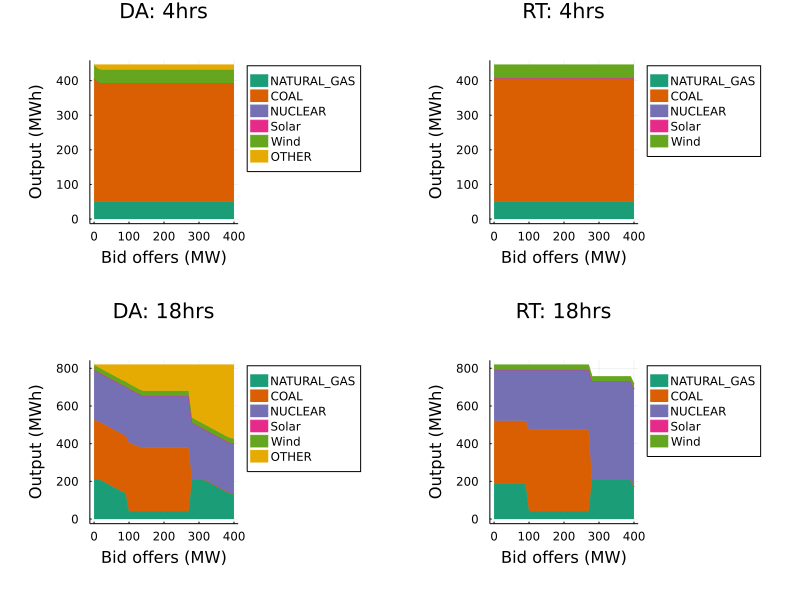

In [17]:
plot(plt_g[1,1,1], plt_g[1,1,2],plt_g[1,2,1], plt_g[1,2,2],layout=4,title=["DA: 4hrs" "RT: 4hrs" "DA: 18hrs" "RT: 18hrs"])

Economic viability

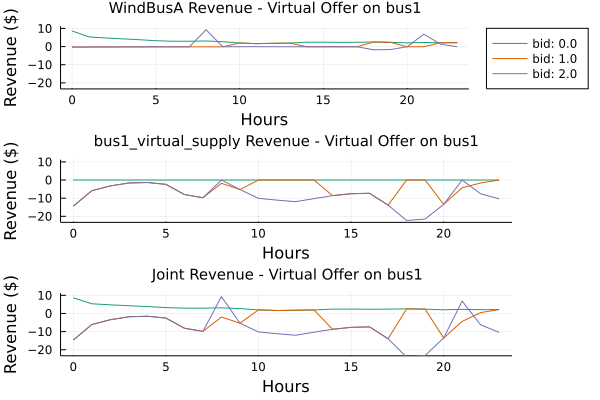

In [18]:
plt_rv[1]

Generation - virtual offer on Bus2

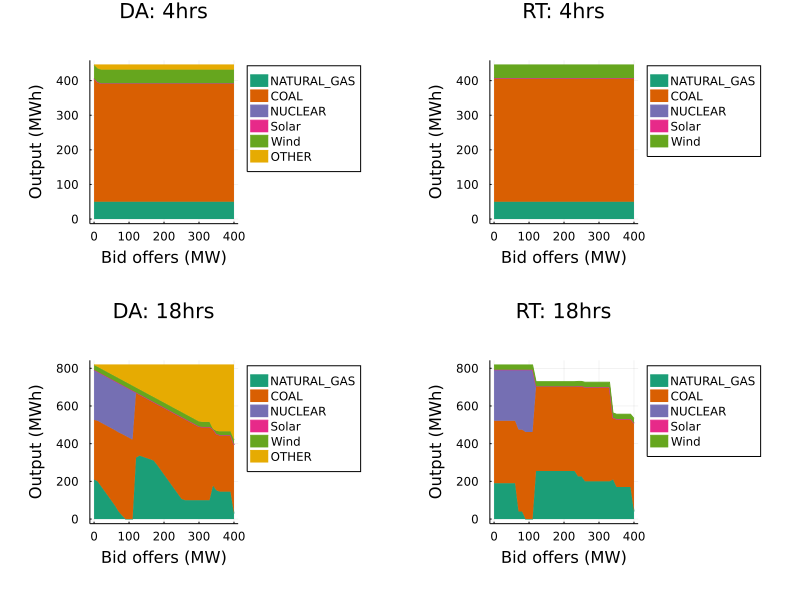

In [19]:
plot(plt_g[2,1,1], plt_g[2,1,2],plt_g[2,2,1], plt_g[2,2,2],layout=4,title=["DA: 4hrs" "RT: 4hrs" "DA: 18hrs" "RT: 18hrs"])

Economic viability

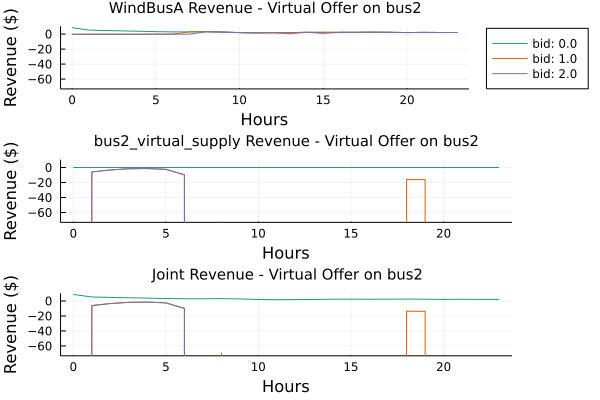

In [20]:
plt_rv[2]

Generation - virtual offer on Bus3

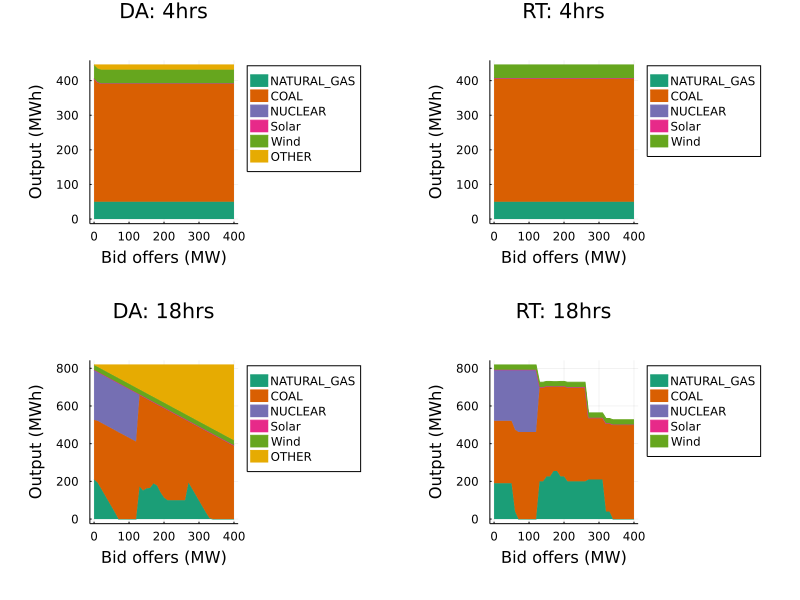

In [21]:
plot(plt_g[3,1,1], plt_g[3,1,2],plt_g[3,2,1], plt_g[3,2,2],layout=4,title=["DA: 4hrs" "RT: 4hrs" "DA: 18hrs" "RT: 18hrs"])

Economic viability

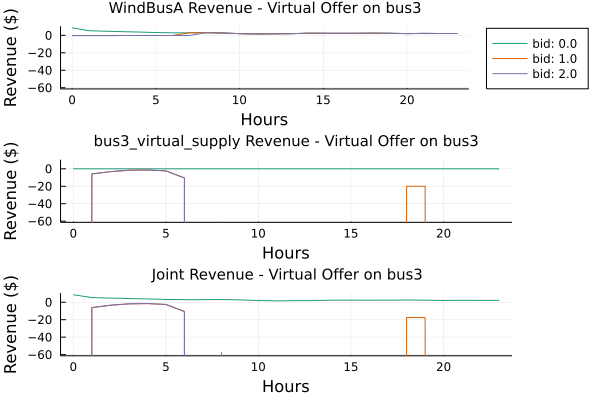

In [22]:
plt_rv[3]

Generation - virtual offer on Bus4

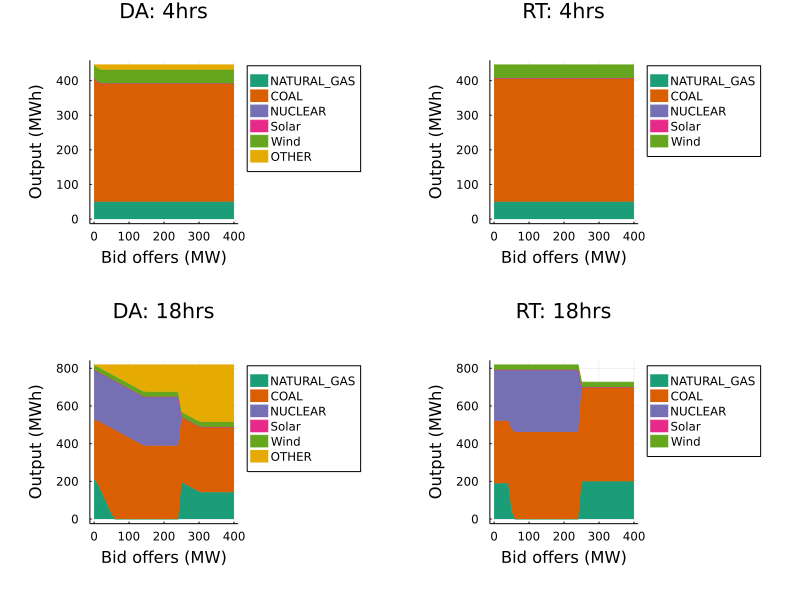

In [23]:
plot(plt_g[4,1,1], plt_g[4,1,2],plt_g[4,2,1], plt_g[4,2,2],layout=4,title=["DA: 4hrs" "RT: 4hrs" "DA: 18hrs" "RT: 18hrs"])

Economic viability

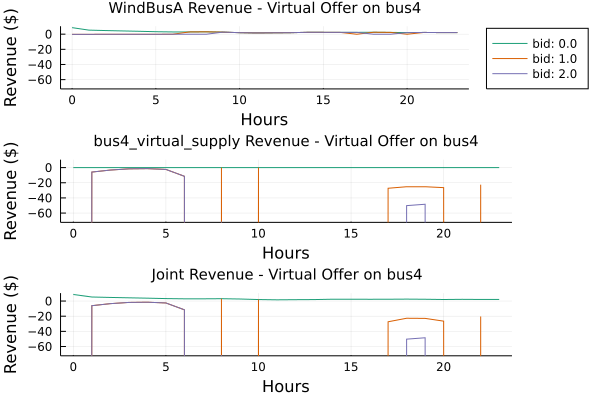

In [24]:
plt_rv[4]

Generation - virtual offer on Bus5

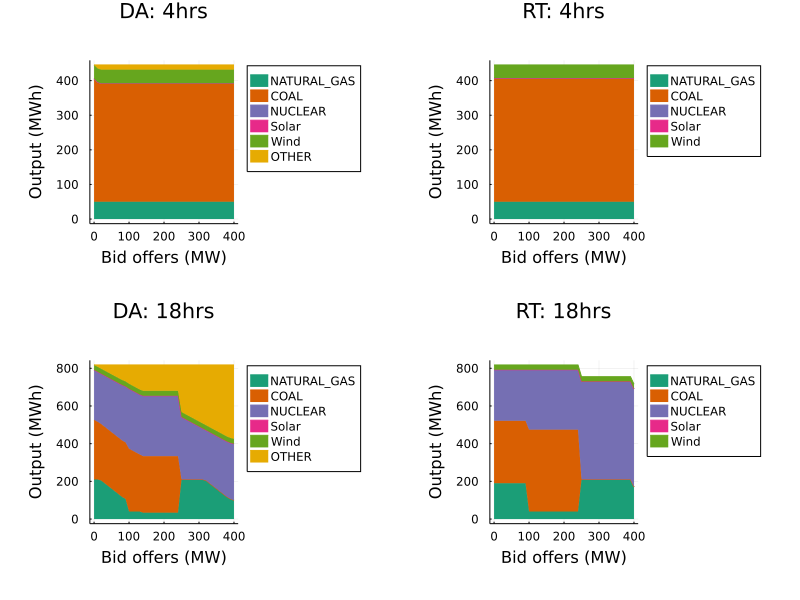

In [25]:
plot(plt_g[5,1,1], plt_g[5,1,2],plt_g[5,2,1], plt_g[5,2,2],layout=4,title=["DA: 4hrs" "RT: 4hrs" "DA: 18hrs" "RT: 18hrs"])

Economic viability

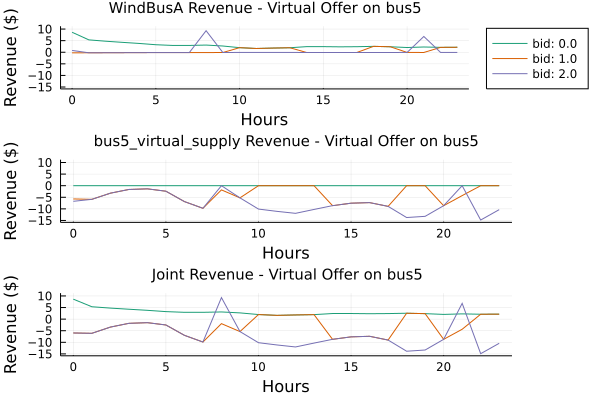

In [26]:
plt_rv[5]

### Balanced and imbalanced bids/offers: Do they have different impacts?

In [32]:
plt_mix[1]

Dict{Any, Any} with 4 entries:
  "revenue - solar" => Plot{Plots.GRBackend() n=3}
  "deficit"         => Plot{Plots.GRBackend() n=3}
  "coal"            => Plot{Plots.GRBackend() n=2}
  "revenue - wind"  => Plot{Plots.GRBackend() n=3}

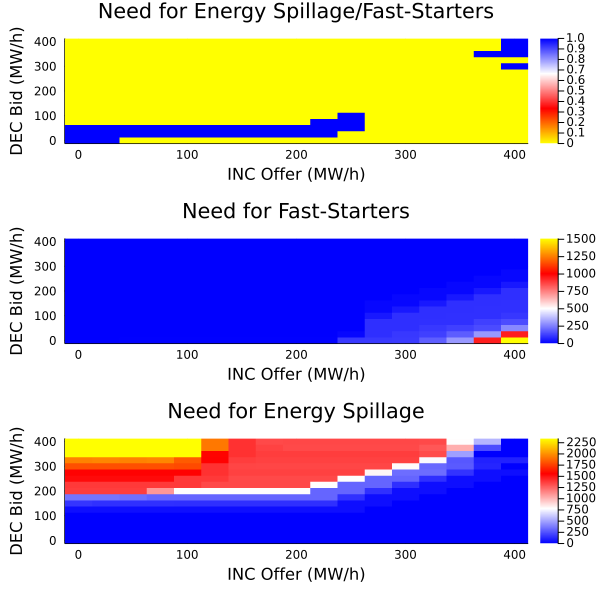

In [28]:
plt_mix[1]["deficit"]

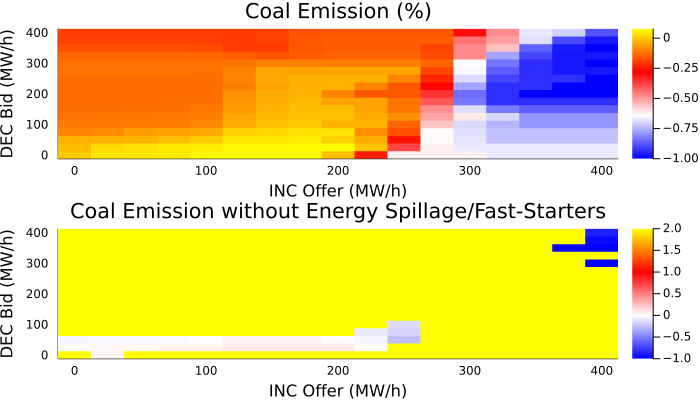

In [29]:
plt_mix[1]["coal"]

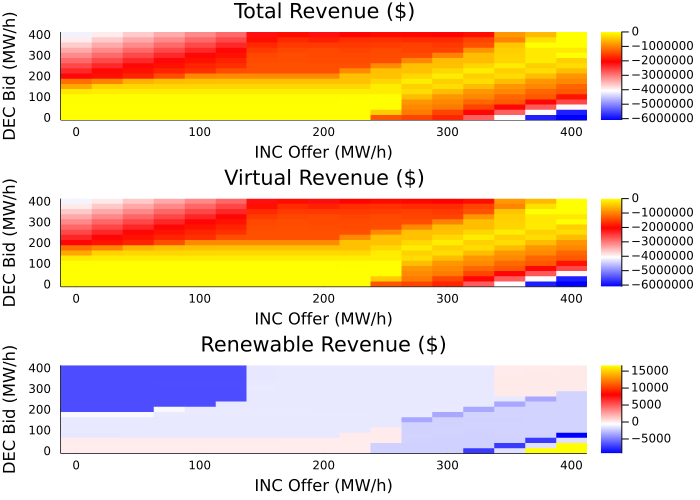

In [30]:
plt_mix[1]["revenue - solar"]

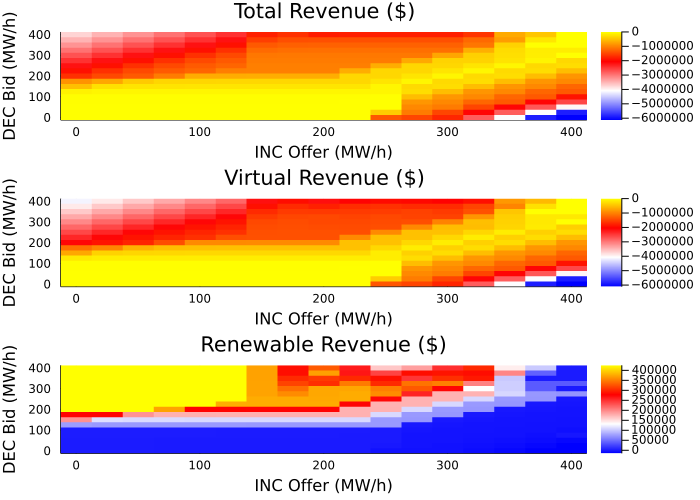

In [31]:
plt_mix[1]["revenue - wind"]